In [1]:
from ase.build import bulk
import matplotlib.pyplot as plt

from dask.distributed import Client

from abtem import show_atoms, FrozenPhonons, Probe, Potential, GridScan, AnnularDetector

import os
os.environ["MKL_NUM_THREADS"] = "1"

from abtem import config
config.set({'device': 'cpu'})
config.set({'lazy': True})
config.set({'fft': 'mkl'})
#config.set({'fftw.threads': 1})

Runtime: 39 s per frozen phonon on 8-core Intel(R) Core(TM) i9-9900K CPU @ 3.60GHz

In [2]:
client = Client()

C:\Users\jacob\anaconda3\envs\abtem-dask-gpu\lib\site-packages\distributed\node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 61090 instead
  warnings.warn(


In [3]:
atoms = bulk('Si', 'diamond', a=5.43, cubic=True)
atoms *= (4, 4, 1)

In [9]:
chunks = 100 # max number of wave functions in each chunk

frozen_phonons = FrozenPhonons(atoms, 1, {'Si': .0})

potential = Potential(atoms, 
                      gpts=512, 
                      projection='infinite', 
                      slice_thickness=1)

probe = Probe(energy=100e3, semiangle_cutoff=20, device='cpu')

scan = GridScan()

detectors = AnnularDetector(50, 150)

measurement = probe.scan(scan, detectors, potential, chunks=chunks)

In [10]:
%%time
measurement.compute()

Wall time: 38.8 s


(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x1a76678cf70>)

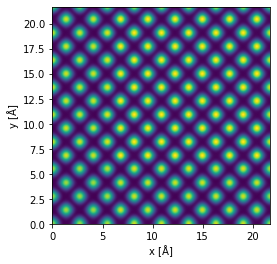

In [20]:
measurement.interpolate(.1).show()